We are going to do some basic data analysis using Python, Pandas, and statsmodel. So first we need to load these libraries:

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Lets look at sediment flux grouped by climate zone. We will load in a different data set:

In [3]:
dfm = pd.read_csv('./data/milliman-farnsworth-database.csv',na_values=('<1','#VALUE!'))

Rename Area so it is easier to use...

In [4]:
dfm['Area'] = dfm['Area, km^2']

Plot sediment flux as a function of catchment area

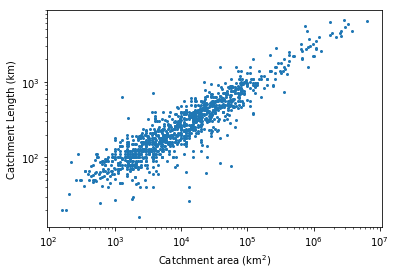

In [5]:
plt.loglog(dfm.Area, dfm.Length, marker='o', linestyle='', ms=2)
plt.xlabel("Catchment area (km$^2$)")
plt.ylabel("Catchment Length (km)")
plt.show()

Lets plot the scatter grouped by climate

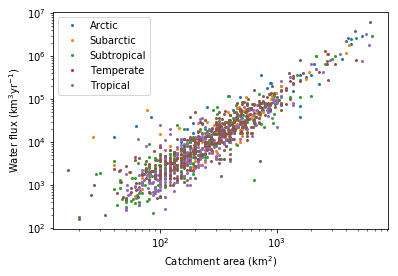

In [6]:
groups = dfm.groupby('Climate_T')
for Climate_T, group in groups:
    plt.loglog(group.Length, group.Area, marker='o', linestyle='', ms=2, label=Climate_T)
plt.legend(('Arctic','Subarctic','Subtropical','Temperate','Tropical'))
plt.xlabel("Catchment area (km$^2$)")
plt.ylabel("Water flux (km$^3$yr$^{-1}$)")
plt.show()

Get linear regression and overlay plot

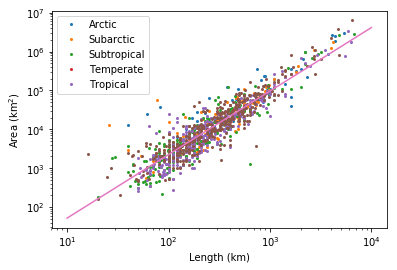

In [7]:
for Climate_T, group in groups:
    plt.loglog(group.Length, group.Area, marker='o', linestyle='', ms=2, label=Climate_T)
plt.legend(('Arctic','Subarctic','Subtropical','Temperate','Tropical'))
plt.ylabel("Area (km$^{2}$)")
plt.xlabel("Length (km)")

X = np.log10(dfm['Length'])
y = np.log10(dfm['Area'])
model = sm.OLS(y,sm.add_constant(X),missing='drop').fit()
xx = np.arange(1e1,1e4)
yy = np.power(10,model.params[0])*np.power(xx,model.params[1])
plt.plot(xx,yy)
plt.show()

model summary to get slope of regression 

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Area   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     5636.
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        10:49:37   Log-Likelihood:                -270.98
No. Observations:                1131   AIC:                             546.0
Df Residuals:                    1129   BIC:                             556.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0811      0.053      1.526      0.127      -0.023       0.185
Length         1.6341      0.022     75.070      0.000       1.591       1.677
==============================================================================
Omnibus:                      139.579   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.322
Skew:                           0.530   Prob(JB):                    5.78e-122
Kurtosis:                       6.275   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""